In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("autocorrelation_times.csv")

subset = df[(df['n'] >= 100) & (df['n'] <= 500)]

print(df.head())  

     n    naive     fft
0  100   1.4092  8.2273
1  200   6.7507  6.7787
2  300  14.3169  9.8841
3  400  22.4692  4.3118
4  500  43.0593  4.1020


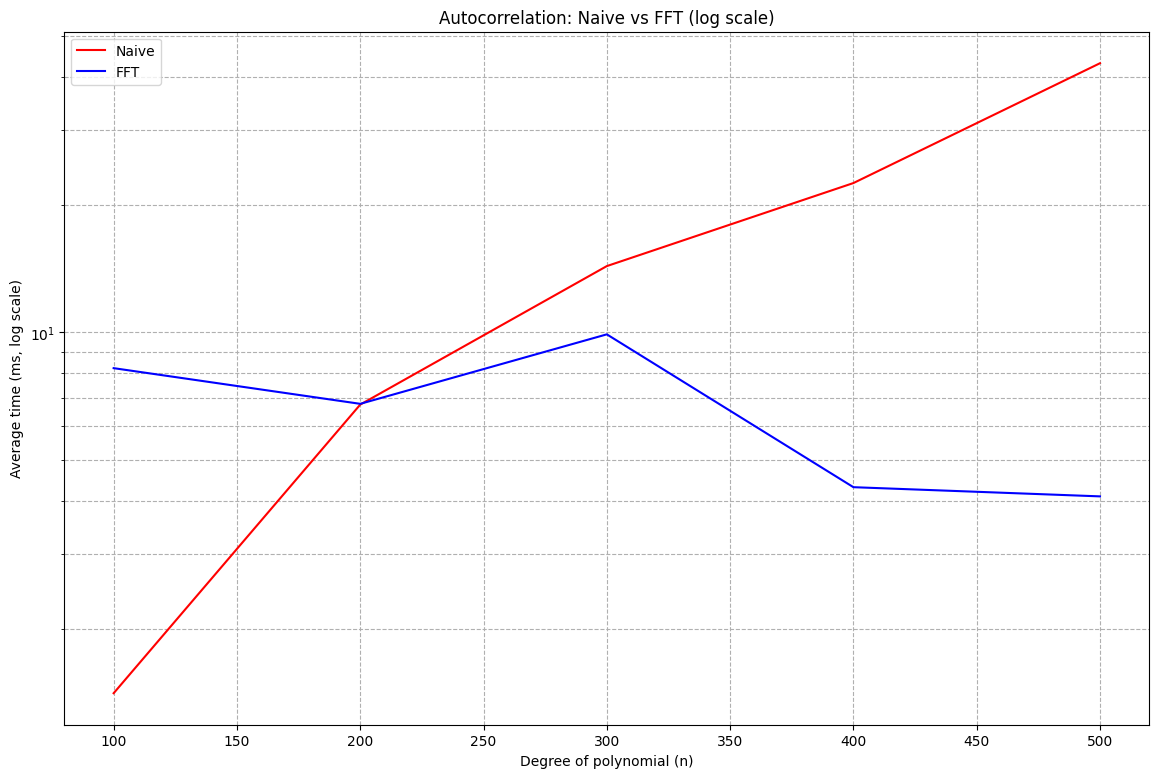

In [3]:
plt.figure(figsize=(14,9))
plt.semilogy(subset['n'], subset['naive'], label='Naive', color='red')
plt.semilogy(subset['n'], subset['fft'], label='FFT', color='blue')


plt.xlabel('Degree of polynomial (n)')
plt.ylabel('Average time (ms, log scale)')
plt.title('Autocorrelation: Naive vs FFT (log scale)')
plt.legend()
plt.grid(True, which='both', ls='--')
plt.show()


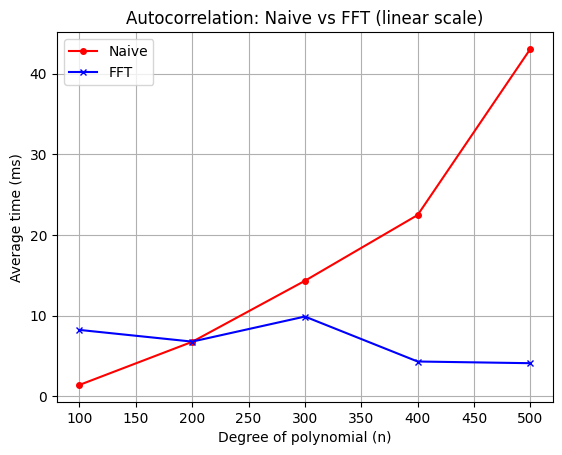

In [4]:
plt.plot(subset['n'], subset['naive'], label='Naive', color='red', marker='o', markersize=4)
plt.plot(subset['n'], subset['fft'], label='FFT', color='blue', marker='x', markersize=4)

plt.xlabel('Degree of polynomial (n)')
plt.ylabel('Average time (ms)')
plt.title('Autocorrelation: Naive vs FFT (linear scale)')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
faster_n = df[df['fft'] < df['naive']]['n'].min()
print(f"FFT начинает быть быстрее при n >= {faster_n}")

FFT начинает быть быстрее при n >= 300


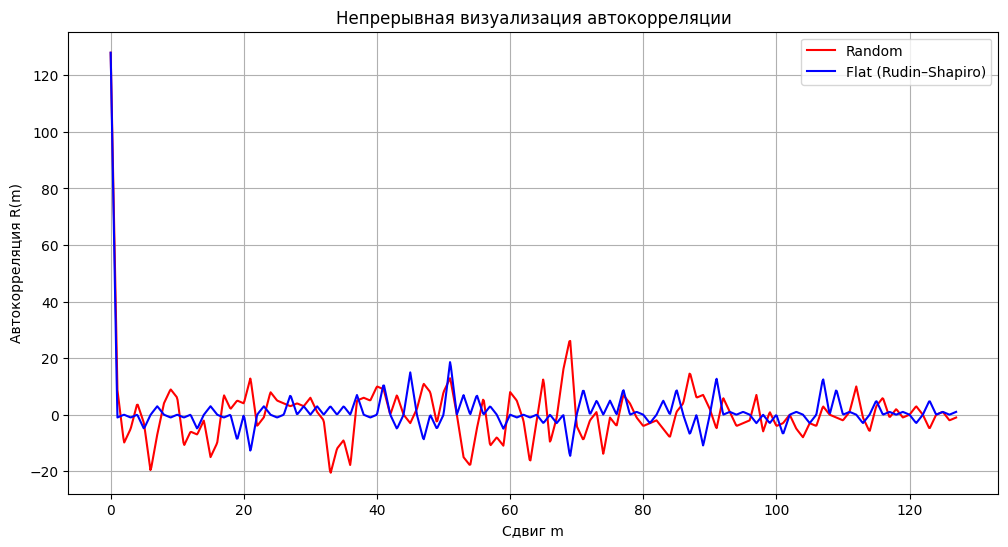

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

with open('../files/random_poly.txt', 'r') as f:
    random_coeffs = np.array([int(x) for x in f.read().split()])

with open('../files/flat_poly.txt', 'r') as f:
    flat_coeffs = np.array([int(x) for x in f.read().split()])

def autocorr(coeffs):
    n = len(coeffs)
    return np.array([np.sum(coeffs[:n - k] * coeffs[k:]) for k in range(n)])

autocorr_rand = autocorr(random_coeffs)
autocorr_flat = autocorr(flat_coeffs)

x_rand = np.arange(len(autocorr_rand))
x_flat = np.arange(len(autocorr_flat))
x_cont_rand = np.linspace(0, len(autocorr_rand) - 1, 1000)
x_cont_flat = np.linspace(0, len(autocorr_flat) - 1, 1000)

f_rand = interp1d(x_rand, autocorr_rand, kind='linear')
f_flat = interp1d(x_flat, autocorr_flat, kind='linear')

plt.figure(figsize=(12, 6))
plt.plot(x_cont_rand, f_rand(x_cont_rand), 'r', label='Random')
plt.plot(x_cont_flat, f_flat(x_cont_flat), 'b', label='Flat (Rudin–Shapiro)')
plt.xlabel('Сдвиг m')
plt.ylabel('Автокорреляция R(m)')
plt.title('Непрерывная визуализация автокорреляции')
plt.legend()
plt.grid(True)
plt.show()


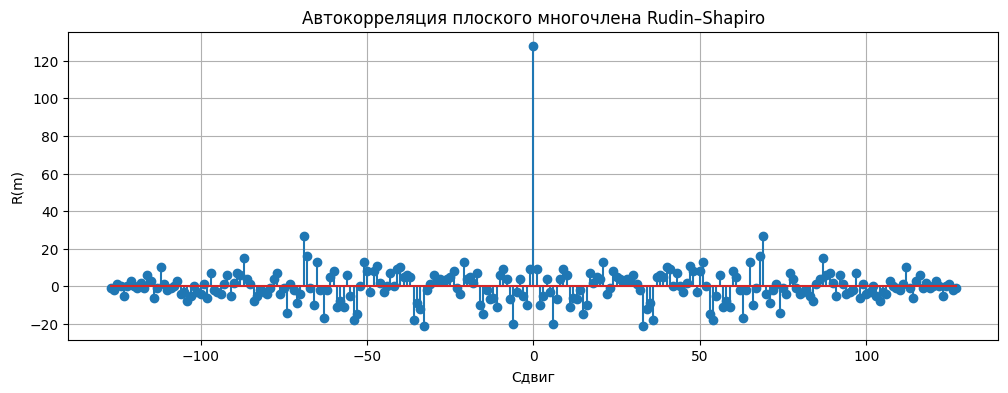

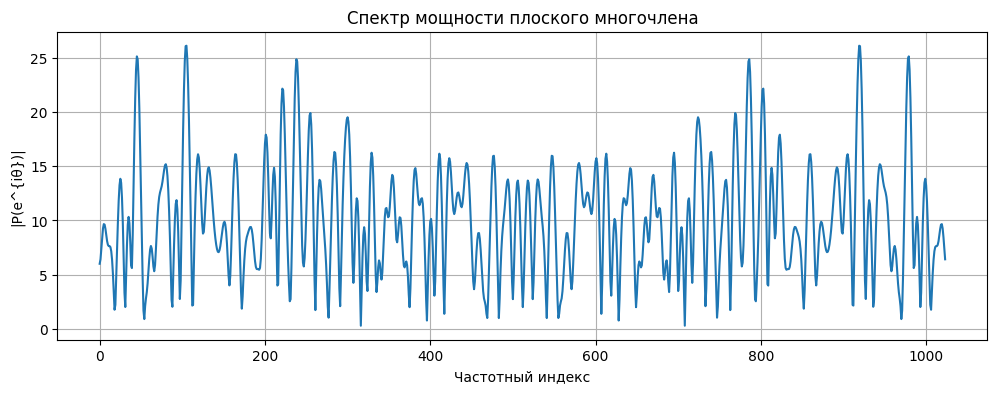

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация Rudin-Shapiro до n=128 (степень 127)
def rudin_shapiro(n):
    seq = np.array([1], dtype=int)
    while len(seq) < n+1:
        seq = np.concatenate([seq, seq])  # удвоение
        seq[len(seq)//2:] *= -1           # модификация
    return seq[:n+1]

n = 127
coeffs = random_coeffs # rudin_shapiro(n)

# Автокорреляция
autocorr = np.correlate(coeffs, coeffs, mode='full')
lags = np.arange(-n, n+1)

plt.figure(figsize=(12,4))
plt.stem(lags, autocorr)
plt.xlabel('Сдвиг')
plt.ylabel('R(m)')
plt.title('Автокорреляция плоского многочлена Rudin–Shapiro')
plt.grid(True)
plt.show()

# Частотный спектр (через FFT)
spectrum = np.fft.fft(coeffs, 1024)
plt.figure(figsize=(12,4))
plt.plot(np.abs(spectrum))
plt.xlabel('Частотный индекс')
plt.ylabel('|P(e^{iθ})|')
plt.title('Спектр мощности плоского многочлена')
plt.grid(True)
plt.show()


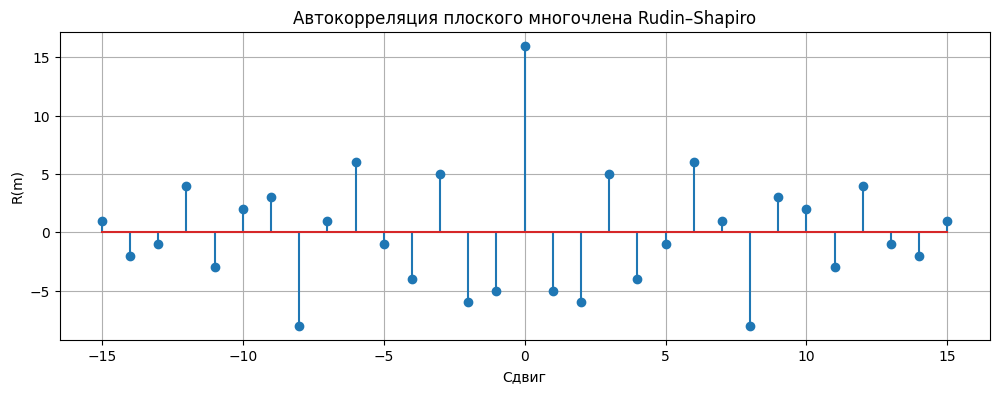

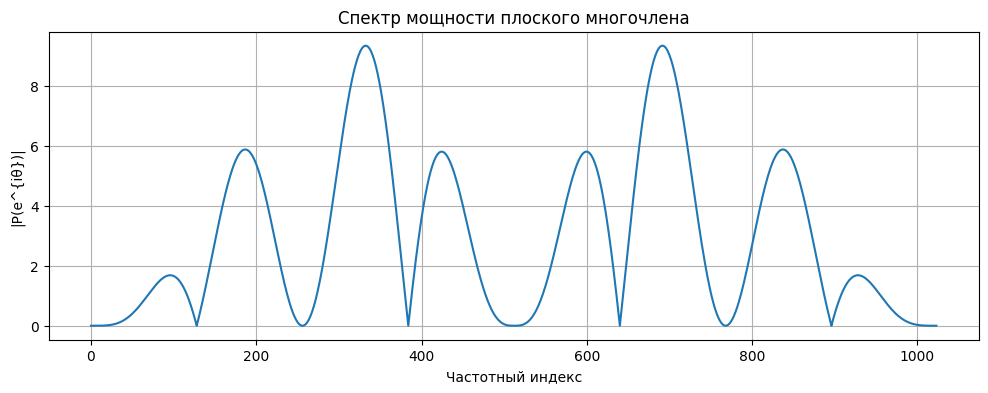

In [104]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация Rudin-Shapiro до n=128 (степень 127)
def rudin_shapiro(n):
    seq = np.array([1], dtype=int)
    while len(seq) < n+1:
        seq = np.concatenate([seq, seq])  # удвоение
        seq[len(seq)//2:] *= -1           # модификация
    return seq[:n+1]

n = 15
coeffs = rudin_shapiro(n)

# Автокорреляция
autocorr = np.correlate(coeffs, coeffs, mode='full')
lags = np.arange(-n, n+1)

plt.figure(figsize=(12,4))
plt.stem(lags, autocorr)
plt.xlabel('Сдвиг')
plt.ylabel('R(m)')
plt.title('Автокорреляция плоского многочлена Rudin–Shapiro')
plt.grid(True)
plt.show()

# Частотный спектр (через FFT)
spectrum = np.fft.fft(coeffs, 1024)
plt.figure(figsize=(12,4))
plt.plot(np.abs(spectrum))
plt.xlabel('Частотный индекс')
plt.ylabel('|P(e^{iθ})|')
plt.title('Спектр мощности плоского многочлена')
plt.grid(True)
plt.show()


In [ ]:
coeffs
1 1 1 -1 1 1 -1 1 1 1 1 -1 -1 -1 1 -1


array([ 1, -1, -1,  1, -1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1])